<a href="https://colab.research.google.com/github/lalitha-sahitya/movie-review-classification/blob/main/movie_reviews_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import os

In [31]:
!pip install opendatasets

In [32]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahityapalacharla
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


100%|██████████| 25.7M/25.7M [00:00<00:00, 93.0MB/s]


In [33]:
os.listdir('imdb-dataset-of-50k-movie-reviews')

['IMDB Dataset.csv']

In [34]:
import pandas as pd

In [35]:
data=pd.read_csv('/content/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [36]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [37]:
data.shape

(50000, 2)

In [38]:
data.isnull().sum()

,0
review,0
sentiment,0


<Axes: xlabel='sentiment', ylabel='count'>

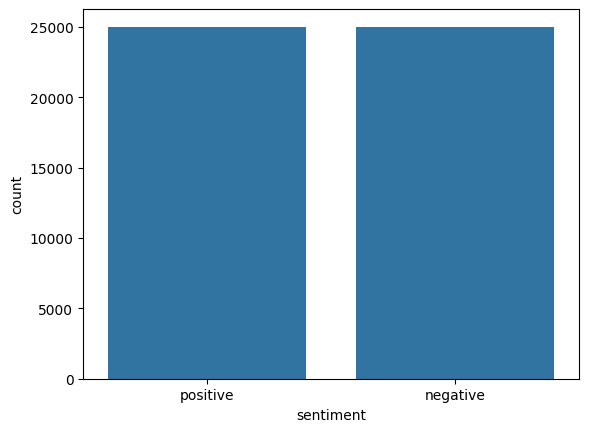

In [39]:
import seaborn as sns
sns.countplot(data=data,x='sentiment')

In [40]:
data.review[2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'